# Adidas Sales Prediction

In [8]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA # autoregressive integrated moving average
import statsmodels.api as sm

In [9]:
df = pd.read_csv('timeseries-data/adidas-quarterly-sales.csv')
df.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [10]:
import plotly.express as px
px.line(df, x='Time Period', y='Revenue', title='Adidas Quarterly Revenue', labels={'Revenue':'Revenue in Billion Euros', 'Time Period':'Quarter'})

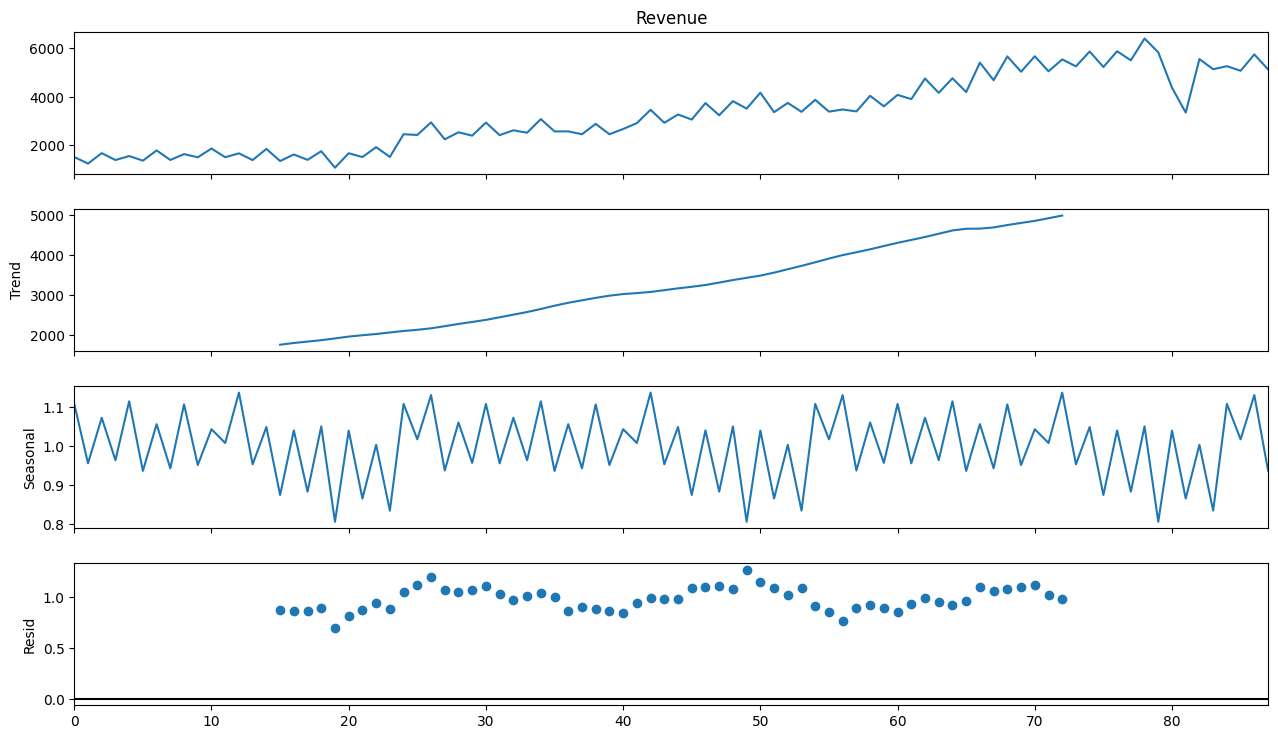

In [11]:
results = seasonal_decompose(df['Revenue'], model='multiplicative', period=30)
fig =results.plot()
fig.set_size_inches(14, 8)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

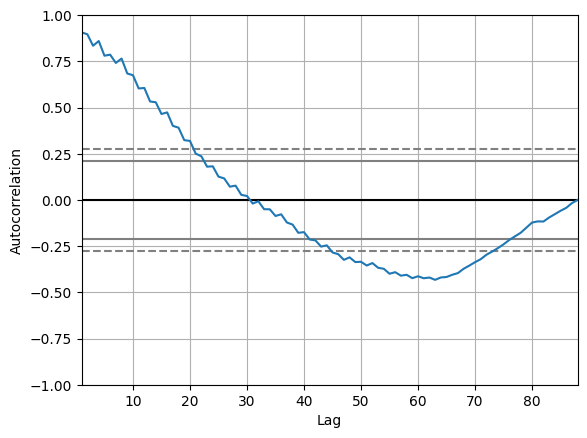

In [12]:
pd.plotting.autocorrelation_plot(df['Revenue'])

In [13]:
model = sm.tsa.statespace.SARIMAX(df['Revenue'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           Revenue   No. Observations:                   88
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -600.455
Date:                           Sun, 08 Sep 2024   AIC                           1210.910
Time:                                   16:17:44   BIC                           1223.004
Sample:                                        0   HQIC                          1215.769
                                            - 88                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7204      0.041     17.507      0.000       0.640       0.801
ma.L1         -1.0000      0.081    -12.304      0.000      -1.159      -0.841
ar.S.L4        0.1170      0.264      0.442      0.658      -0.401       0.635
ma.S.L4       -0.8154      0.138     -5.914      0.000      -1.086      -0.545
sigma2      1.025e+05   7.94e-07   1.29e+11      0.000    1.02e+05    1.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):               741.75
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               8.93   Skew:                            -2.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.69e+27. Standard errors may be unstable.
"""

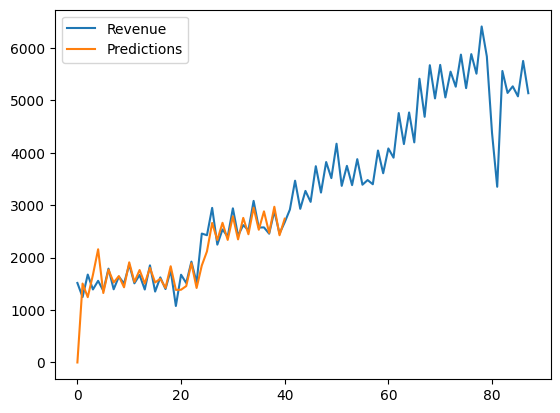

In [14]:
predicitons = results.predict(start=0, end=40)
df['Predictions'] = predicitons
df[['Revenue', 'Predictions']].plot()
plt.show()

# Deep Learning LSTM  , Pychart (autoML)